In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model  as lm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from datetime import datetime, date

% matplotlib inline

In [92]:
df = pd.read_csv('/Users/Jdoyle216/Downloads/archive-5/train.csv',encoding = "ISO-8859-1")

In [93]:
df.head()

,Salary,Born,City,Pr/St,Cntry,Nat,Ht,Wt,DftYr,DftRd,...,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G
0,925000,97-01-30,Sainte-Marie,QC,CAN,CAN,74,190,2015.0,1.0,...,1.0,0.0,-0.2,-0.2,40.03,1,0.0,175.7,-0.4,-0.38
1,2250000,93-12-21,Ottawa,ON,CAN,CAN,74,207,2012.0,1.0,...,98.0,-0.2,3.4,3.2,2850.59,290,13.3,112.5,14.1,0.18
2,8000000,88-04-16,St. Paul,MN,USA,USA,72,218,2006.0,1.0,...,70.0,3.7,1.3,5.0,2486.75,102,6.6,114.8,36.8,0.57
3,3500000,92-01-07,Ottawa,ON,CAN,CAN,77,220,2010.0,1.0,...,22.0,0.0,0.4,0.5,1074.41,130,17.5,105.1,5.9,0.20
4,1750000,94-03-29,Toronto,ON,CAN,CAN,76,217,2012.0,1.0,...,68.0,-0.1,1.4,1.3,3459.09,425,8.3,99.5,21.8,0.27


In [94]:
#head doens't allow me to see all of the columns so I do it another way
seecolumns = []
for x in df.columns:
    seecolumns.append(x)
    
print(seecolumns)

['Salary', 'Born', 'City', 'Pr/St', 'Cntry', 'Nat', 'Ht', 'Wt', 'DftYr', 'DftRd', 'Ovrl', 'Hand', 'Last Name', 'First Name', 'Position', 'Team', 'GP', 'G', 'A', 'A1', 'A2', 'PTS', '+/-', 'E+/-', 'PIM', 'Shifts', 'TOI', 'TOIX', 'TOI/GP', 'TOI/GP.1', 'TOI%', 'IPP%', 'SH%', 'SV%', 'PDO', 'F/60', 'A/60', 'Pct%', 'Diff', 'Diff/60', 'iCF', 'iCF.1', 'iFF', 'iSF', 'iSF.1', 'iSF.2', 'ixG', 'iSCF', 'iRB', 'iRS', 'iDS', 'sDist', 'sDist.1', 'Pass', 'iHF', 'iHF.1', 'iHA', 'iHDf', 'iMiss', 'iGVA', 'iTKA', 'iBLK', 'iGVA.1', 'iTKA.1', 'iBLK.1', 'BLK%', 'iFOW', 'iFOL', 'iFOW.1', 'iFOL.1', 'FO%', '%FOT', 'dzFOW', 'dzFOL', 'nzFOW', 'nzFOL', 'ozFOW', 'ozFOL', 'FOW.Up', 'FOL.Up', 'FOW.Down', 'FOL.Down', 'FOW.Close', 'FOL.Close', 'OTG', '1G', 'GWG', 'ENG', 'PSG', 'PSA', 'G.Bkhd', 'G.Dflct', 'G.Slap', 'G.Snap', 'G.Tip', 'G.Wrap', 'G.Wrst', 'CBar ', 'Post', 'Over', 'Wide', 'S.Bkhd', 'S.Dflct', 'S.Slap', 'S.Snap', 'S.Tip', 'S.Wrap', 'S.Wrst', 'iPenT', 'iPenD', 'iPENT', 'iPEND', 'iPenDf', 'NPD', 'Min', 'Maj', '

In [95]:
print(list(df.columns))
#Found this with a google and is quicker

['Salary', 'Born', 'City', 'Pr/St', 'Cntry', 'Nat', 'Ht', 'Wt', 'DftYr', 'DftRd', 'Ovrl', 'Hand', 'Last Name', 'First Name', 'Position', 'Team', 'GP', 'G', 'A', 'A1', 'A2', 'PTS', '+/-', 'E+/-', 'PIM', 'Shifts', 'TOI', 'TOIX', 'TOI/GP', 'TOI/GP.1', 'TOI%', 'IPP%', 'SH%', 'SV%', 'PDO', 'F/60', 'A/60', 'Pct%', 'Diff', 'Diff/60', 'iCF', 'iCF.1', 'iFF', 'iSF', 'iSF.1', 'iSF.2', 'ixG', 'iSCF', 'iRB', 'iRS', 'iDS', 'sDist', 'sDist.1', 'Pass', 'iHF', 'iHF.1', 'iHA', 'iHDf', 'iMiss', 'iGVA', 'iTKA', 'iBLK', 'iGVA.1', 'iTKA.1', 'iBLK.1', 'BLK%', 'iFOW', 'iFOL', 'iFOW.1', 'iFOL.1', 'FO%', '%FOT', 'dzFOW', 'dzFOL', 'nzFOW', 'nzFOL', 'ozFOW', 'ozFOL', 'FOW.Up', 'FOL.Up', 'FOW.Down', 'FOL.Down', 'FOW.Close', 'FOL.Close', 'OTG', '1G', 'GWG', 'ENG', 'PSG', 'PSA', 'G.Bkhd', 'G.Dflct', 'G.Slap', 'G.Snap', 'G.Tip', 'G.Wrap', 'G.Wrst', 'CBar ', 'Post', 'Over', 'Wide', 'S.Bkhd', 'S.Dflct', 'S.Slap', 'S.Snap', 'S.Tip', 'S.Wrap', 'S.Wrst', 'iPenT', 'iPenD', 'iPENT', 'iPEND', 'iPenDf', 'NPD', 'Min', 'Maj', '

In [96]:

#Let's concat the first and last names
df['Name'] = df['First Name'] + [' '] + df['Last Name']
df.head()

,Salary,Born,City,Pr/St,Cntry,Nat,Ht,Wt,DftYr,DftRd,...,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G,Name
0,925000,97-01-30,Sainte-Marie,QC,CAN,CAN,74,190,2015.0,1.0,...,0.0,-0.2,-0.2,40.03,1,0.0,175.7,-0.4,-0.38,Thomas Chabot
1,2250000,93-12-21,Ottawa,ON,CAN,CAN,74,207,2012.0,1.0,...,-0.2,3.4,3.2,2850.59,290,13.3,112.5,14.1,0.18,Cody Ceci
2,8000000,88-04-16,St. Paul,MN,USA,USA,72,218,2006.0,1.0,...,3.7,1.3,5.0,2486.75,102,6.6,114.8,36.8,0.57,Kyle Okposo
3,3500000,92-01-07,Ottawa,ON,CAN,CAN,77,220,2010.0,1.0,...,0.0,0.4,0.5,1074.41,130,17.5,105.1,5.9,0.20,Erik Gudbranson
4,1750000,94-03-29,Toronto,ON,CAN,CAN,76,217,2012.0,1.0,...,-0.1,1.4,1.3,3459.09,425,8.3,99.5,21.8,0.27,Tom Wilson


# I'd like to see the Age's of each player in additon to the birthdates

In [97]:
df.Born.max()

'98-07-29'

In [98]:
df['Born2'] = '19' + df['Born']
df.Born2

0      1997-01-30
1      1993-12-21
2      1988-04-16
3      1992-01-07
4      1994-03-29
          ...    
607    1992-09-26
608    1985-01-21
609    1987-03-30
610    1982-10-31
611    1993-05-12
Name: Born2, Length: 612, dtype: object

In [99]:
def age(born):
    born = datetime.strptime(born, '%Y-%m-%d').date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))


  
df['Age'] = df['Born2'].apply(age)
  
print(df['Age'])

0      24
1      27
2      33
3      29
4      27
       ..
607    28
608    36
609    34
610    38
611    28
Name: Age, Length: 612, dtype: int64


In [100]:
df.drop(['Born'], axis=1,inplace=True)

In [101]:
df.rename(columns={"Born2": "Born"},inplace=True)

In [103]:
df['Age'].describe()

count    612.000000
mean      30.686275
std        4.452287
min       23.000000
25%       27.000000
50%       30.000000
75%       34.000000
max       49.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Count'>

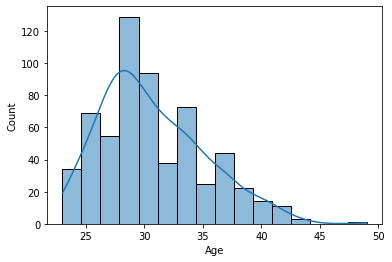

In [104]:
#now that we have age, lets see what it looks like as a distribution
sns.histplot(data=df,x='Age',kde=True)

In [105]:
df['Age'].corr(df['Salary'])
#unsurprisngly age is corelated with salary although not very strongly

0.42194098860003326

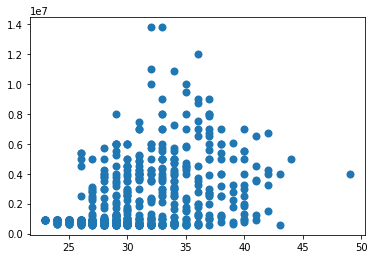

In [107]:
plt.scatter('Age','Salary', data=df, linewidth=2)

In [108]:
#interesting outlier at almost 50 in a high contact sport
oldest_player = df[df['Age'] == df['Age'].max()]['Last Name']
print(oldest_player)
# I had a feeling it was Jagr or Chara

131    Jagr
Name: Last Name, dtype: object


<AxesSubplot:xlabel='count', ylabel='Cntry'>

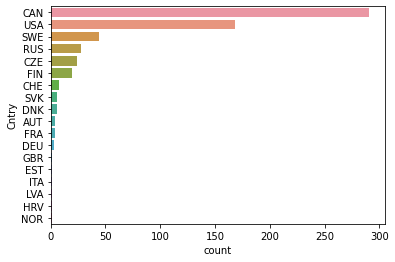

In [110]:
#Switching Gears lets take a look at the countries column
order1 = df.Cntry.value_counts().index

sns.countplot(data=df,y='Cntry',order=order1)

#unsurpsingly Canada reigns supreme

<AxesSubplot:xlabel='Wt', ylabel='Count'>

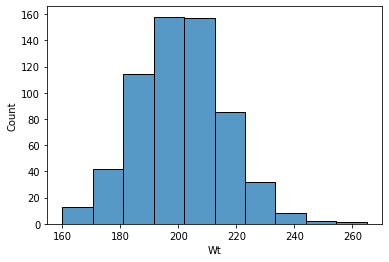

In [111]:
sns.histplot(data=df,x='Wt',bins=10)

<AxesSubplot:xlabel='Ht', ylabel='Count'>

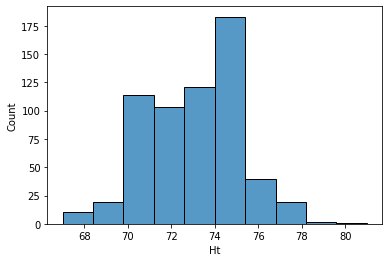

In [112]:
sns.histplot(data=df,x='Ht',bins=10)

AttributeError: 'AxesSubplot' object has no attribute 'show'

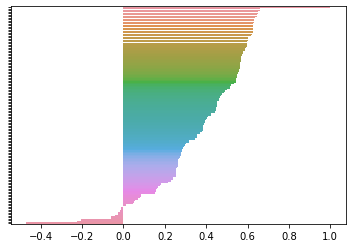

In [113]:
Corrs = df.corrwith(df["Salary"])
sortedcorrs = Corrs.sort_values(ascending=False)
ax = sns.barplot(y=sortedcorrs.index,x=sortedcorrs)
ax.set_yticklabels([])
ax.show()

In [114]:
df.isnull().sum(axis = 0).sort_values(ascending=False).head(50)

Pr/St      153
Ovrl       100
DftRd      100
DftYr      100
sDist.1     16
iHA          9
iCF          8
iHDf         8
iSF          8
iFF          8
iRB          8
iDS          7
SH%          2
GS/G         2
PDO          2
TOI%         1
iPENT        1
CF           1
A/60         1
iFOW.1       1
iFOL.1       1
iHF.1        1
%FOT         1
iPEND        1
F/60         1
Pass         1
IPP%         1
SV%          1
iRS          1
FF           1
iSCF         1
ixG          1
TOIX         1
CA           1
FA           1
Diff/60      1
FOL          1
iGVA.1       1
GS           1
Pace         1
iTKA.1       1
OTOI         1
iBLK.1       1
BLK%         1
PEND         1
PENT         1
TKA          1
GVA          1
HA           1
SF           1
dtype: int64

In [115]:
df[df['Pace'].isnull()]

,Salary,City,Pr/St,Cntry,Nat,Ht,Wt,DftYr,DftRd,Ovrl,...,PS,OTOI,Grit,DAP,Pace,GS,GS/G,Name,Born,Age
290,692500,Pickering,ON,CAN,CAN,74,205,NaN,NaN,NaN,...,0.0,NaN,3,0.0,NaN,NaN,NaN,Dan Renouf,1994-06-01,27


In [116]:
df.drop([0,290],inplace=True)

In [117]:
df.isnull().sum(axis = 0).sort_values(ascending=False).head(17)

Pr/St      153
DftYr       99
Ovrl        99
DftRd       99
sDist.1     15
iHA          8
iHDf         8
iSF          7
iDS          7
iFF          7
iCF          7
iRB          7
PDO          1
SH%          1
IPP%         1
GS/G         1
Pass         1
dtype: int64

In [118]:
df.DftRd.dtype

dtype('float64')

In [120]:
df['DftRd'].fillna(8.0, inplace = True)
df.DftRd.replace({9: 8}, inplace=True)

<AxesSubplot:xlabel='DftRd', ylabel='Count'>

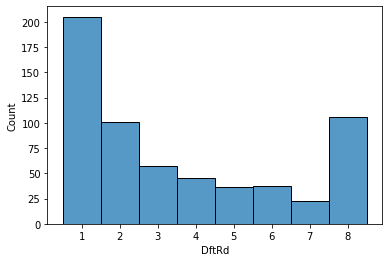

In [121]:
df['DftRd'].value_counts()
sns.histplot(x='DftRd',data=df, discrete=True)

In [122]:
df.groupby('Age')['Cntry'].value_counts()

Age  Cntry
23   USA      4
     CAN      2
     FIN      1
     RUS      1
     SWE      1
             ..
42   USA      1
43   CHE      1
     CZE      1
44   SVK      1
49   CZE      1
Name: Cntry, Length: 123, dtype: int64

In [123]:


df2 = df[['Salary', 'Name', 'Born', 'Age', 'City', 'Pr/St', 'Cntry', 'Nat', 'Ht', 'Wt', 'DftYr', 'DftRd', 'Ovrl', 'Hand', 'Position', 'Team', 'GP', 'G', 'A', 'PTS', '+/-', 'E+/-', 'PIM', 'Shifts', 'TOI']]

In [124]:
df2.head()

,Salary,Name,Born,Age,City,Pr/St,Cntry,Nat,Ht,Wt,...,Team,GP,G,A,PTS,+/-,E+/-,PIM,Shifts,TOI
1,2250000,Cody Ceci,1993-12-21,27,Ottawa,ON,CAN,CAN,74,207,...,OTT,79,2,15,17,-11,-10.4,20,2418,109992
2,8000000,Kyle Okposo,1988-04-16,33,St. Paul,MN,USA,USA,72,218,...,BUF,65,19,26,45,-7,-1.4,24,1443,73983
3,3500000,Erik Gudbranson,1992-01-07,29,Ottawa,ON,CAN,CAN,77,220,...,VAN,30,1,5,6,-14,-5.3,18,765,36603
4,1750000,Tom Wilson,1994-03-29,27,Toronto,ON,CAN,CAN,76,217,...,WSH,82,7,12,19,9,4.1,133,1453,63592
5,1500000,Brian Campbell,1979-05-23,42,Strathroy,ON,CAN,CAN,70,192,...,CHI,80,5,12,17,12,0.7,24,1896,88462


<AxesSubplot:>

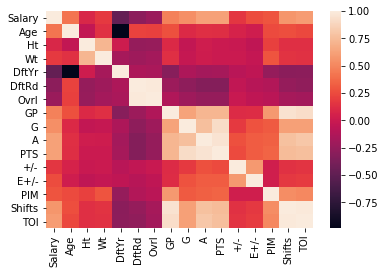

In [125]:
sns.heatmap(df2.corr())

In [126]:
df2['Wt'].corr(df2['Salary'])

0.179691222664552

In [127]:
df2['Wt'].corr(df2['Ht'])

0.7209536520977574

In [128]:
df2['Wt'].corr(df2['Age'])

0.14393815623240724

In [129]:
df2['Wt'].corr(df2['PIM'])

0.2881763179025812

In [131]:
df2.head()

,Salary,Name,Born,Age,City,Pr/St,Cntry,Nat,Ht,Wt,...,Team,GP,G,A,PTS,+/-,E+/-,PIM,Shifts,TOI
1,2250000,Cody Ceci,1993-12-21,27,Ottawa,ON,CAN,CAN,74,207,...,OTT,79,2,15,17,-11,-10.4,20,2418,109992
2,8000000,Kyle Okposo,1988-04-16,33,St. Paul,MN,USA,USA,72,218,...,BUF,65,19,26,45,-7,-1.4,24,1443,73983
3,3500000,Erik Gudbranson,1992-01-07,29,Ottawa,ON,CAN,CAN,77,220,...,VAN,30,1,5,6,-14,-5.3,18,765,36603
4,1750000,Tom Wilson,1994-03-29,27,Toronto,ON,CAN,CAN,76,217,...,WSH,82,7,12,19,9,4.1,133,1453,63592
5,1500000,Brian Campbell,1979-05-23,42,Strathroy,ON,CAN,CAN,70,192,...,CHI,80,5,12,17,12,0.7,24,1896,88462


In [140]:
df_numerical = df2.select_dtypes(include='int64')
df_categorical = df.select_dtypes(include='object')

In [141]:
df_numerical

,Salary,Age,Ht,Wt,GP,G,A,PTS,+/-,PIM,Shifts,TOI
1,2250000,27,74,207,79,2,15,17,-11,20,2418,109992
2,8000000,33,72,218,65,19,26,45,-7,24,1443,73983
3,3500000,29,77,220,30,1,5,6,-14,18,765,36603
4,1750000,27,76,217,82,7,12,19,9,133,1453,63592
5,1500000,42,70,192,80,5,12,17,12,24,1896,88462
...,...,...,...,...,...,...,...,...,...,...,...,...
607,600000,28,73,201,70,6,11,17,-2,20,1258,53712
608,9000000,36,74,206,82,9,31,40,34,36,2319,132469
609,4250000,34,73,205,75,6,22,28,4,35,1982,95555
610,7000000,38,71,196,78,10,18,28,10,24,1945,78712


In [142]:
df_categorical

,City,Pr/St,Cntry,Nat,Hand,Last Name,First Name,Position,Team,Name,Born
1,Ottawa,ON,CAN,CAN,R,Ceci,Cody,D,OTT,Cody Ceci,1993-12-21
2,St. Paul,MN,USA,USA,R,Okposo,Kyle,RW,BUF,Kyle Okposo,1988-04-16
3,Ottawa,ON,CAN,CAN,R,Gudbranson,Erik,D,VAN,Erik Gudbranson,1992-01-07
4,Toronto,ON,CAN,CAN,R,Wilson,Tom,RW,WSH,Tom Wilson,1994-03-29
5,Strathroy,ON,CAN,CAN,L,Campbell,Brian,D,CHI,Brian Campbell,1979-05-23
...,...,...,...,...,...,...,...,...,...,...,...
607,Denver,CO,USA,USA,R,Shore,Nick,C,L.A,Nick Shore,1992-09-26
608,Madison,WI,USA,USA,L,Suter,Ryan,D,MIN,Ryan Suter,1985-01-21
609,Montreal,QC,CAN,CAN,L,Vlasic,Marc-Edouard,D,S.J,Marc-Edouard Vlasic,1987-03-30
610,Kladno,NaN,CZE,CZE,L,Plekanec,Tomas,C,MTL,Tomas Plekanec,1982-10-31


In [143]:
X = df_numerical.iloc[:,1:]
y = df_numerical.iloc[:,0]

In [144]:

X = preprocessing.normalize(X)
X

array([[2.45412534e-04, 6.72612129e-04, 1.88149609e-03, ...,
        1.81787062e-04, 2.19780558e-02, 9.99756126e-01],
       [4.45961084e-04, 9.73006001e-04, 2.94604595e-03, ...,
        3.24335334e-04, 1.95006619e-02, 9.99804208e-01],
       [7.92095065e-04, 2.10314897e-03, 6.00899705e-03, ...,
        4.91645213e-04, 2.08949215e-02, 9.99760540e-01],
       ...,
       [3.55738402e-04, 7.63791275e-04, 2.14489331e-03, ...,
        3.66201296e-04, 2.07374563e-02, 9.99781853e-01],
       [4.82623258e-04, 9.01743456e-04, 2.48931996e-03, ...,
        3.04814689e-04, 2.47026905e-02, 9.99690577e-01],
       [2.71724700e-04, 7.56947378e-04, 2.19320651e-03, ...,
        3.10542514e-04, 2.29510327e-02, 9.99733398e-01]])

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [146]:
regressor = lm.LinearRegression()  
regressor.fit(X_train, y_train)
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

27955064.979221348
[ 1.09951498e+08 -9.14292488e+05 -1.80446394e+07 -2.56573535e+09
 -1.20536670e+11 -1.21152209e+11  1.23360613e+11 -5.94456083e+07
  3.24758450e+08 -1.50182468e+08 -2.02034122e+07]


In [147]:
y_pred = regressor.predict(X_test)
df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df3

,Actual,Predicted
579,667500,4.100032e+06
53,1050000,2.427380e+06
534,600000,1.315976e+06
348,5000000,2.453564e+06
56,4750000,1.823497e+06
...,...,...
484,600000,1.177120e+06
296,1200000,3.493025e+06
374,6000000,4.160520e+06
515,832500,2.944527e+06


<AxesSubplot:>

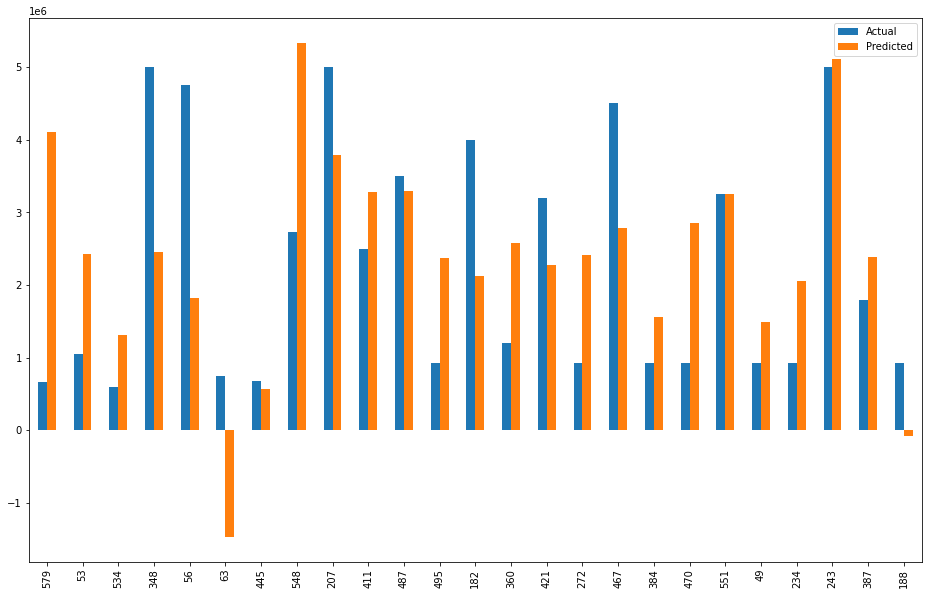

In [149]:
df4 = df3.head(25)
df4.plot(kind='bar',figsize=(16,10))

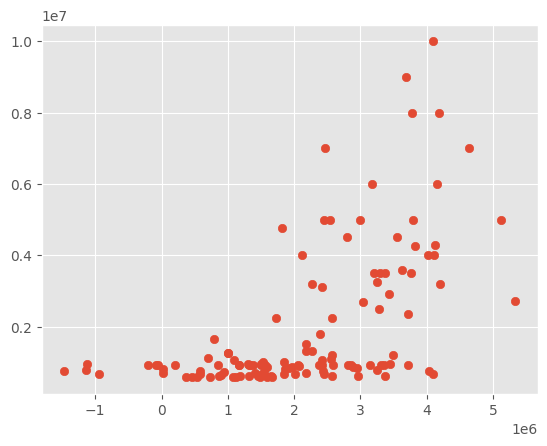

In [155]:
plt.scatter(y_pred, y_test)
plt.show()

/anaconda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


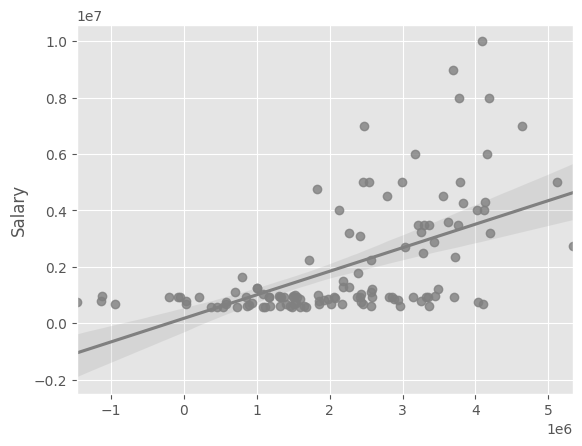

In [165]:
sns.regplot(y_pred, y_test, color='gray')
plt.show()

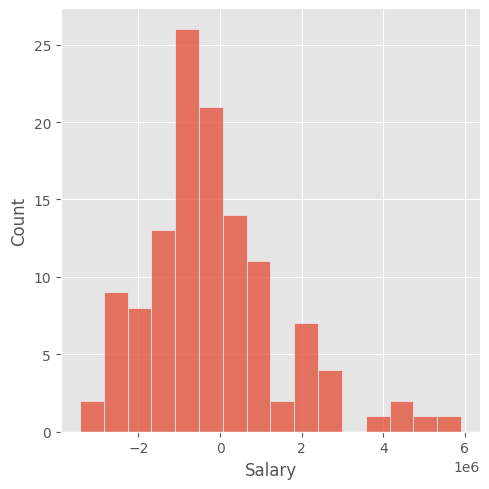

In [166]:
sns.displot(y_test-y_pred)

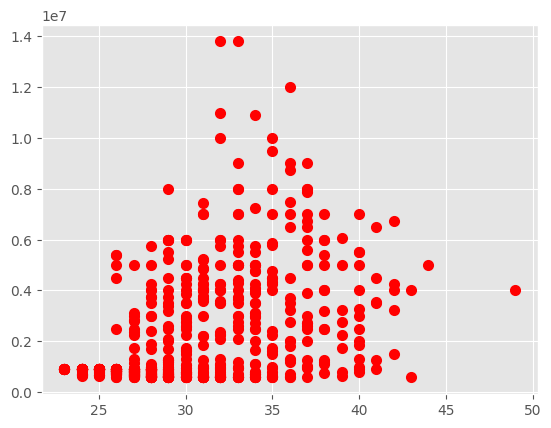

In [167]:
plt.scatter('Age','Salary', data=df2, color='red', linewidth=2)

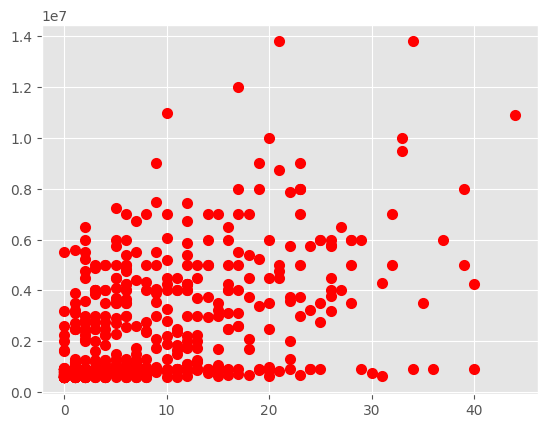

In [168]:
plt.scatter('G','Salary', data=df2, color='red', linewidth=2)

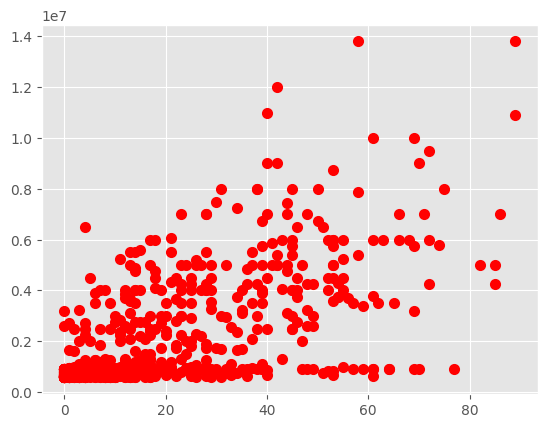

In [169]:
plt.scatter('PTS','Salary', data=df2, color='red', linewidth=2)

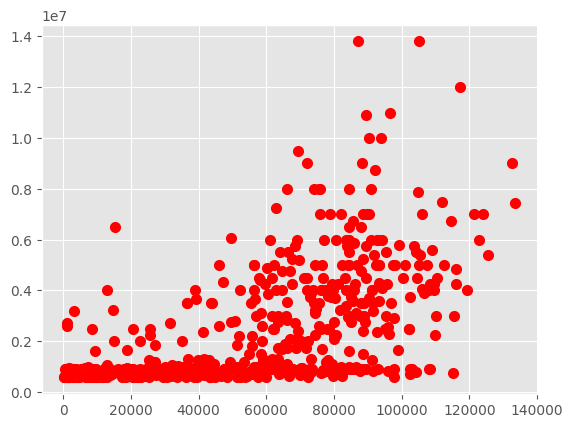

In [170]:
plt.scatter('TOI','Salary', data=df2, color='red', linewidth=2)

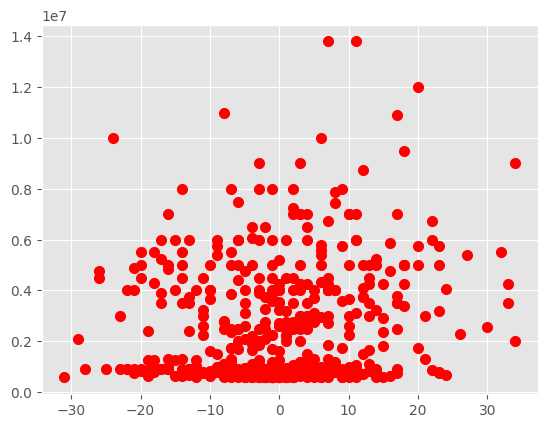

In [171]:
plt.scatter('+/-','Salary', data=df2, color='red', linewidth=2)

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 1       D
2      RW
3       D
4      RW
5       D
       ..
607     C
608     D
609     D
610     C
611     D
Name: Position, Length: 610, dtype: object

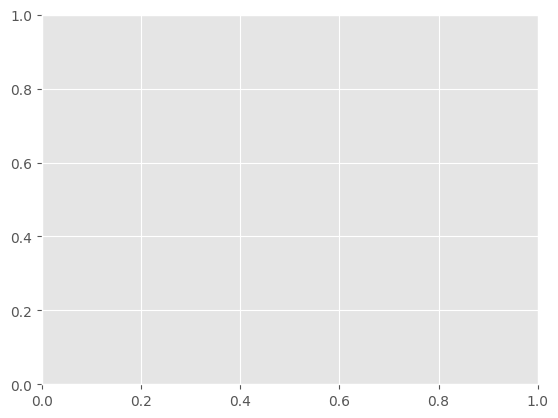

In [172]:
plt.scatter('G','Salary', data=df2, c='Position')

In [173]:
df2.groupby('Position').describe()
#doesn't really tell us much. The combination of position just makes it convoluted.
#could divide between D and Forward and drop the d/f combos to see what that looks like

Salary                                                               \
          count          mean           std        min        25%        50%   
Position                                                                       
C          96.0  2.102387e+06  2.448313e+06   575000.0   663125.0   925000.0   
C/D         1.0  9.250000e+05           NaN   925000.0   925000.0   925000.0   
C/LW       46.0  1.905587e+06  1.754793e+06   575000.0   794375.0   925000.0   
C/LW/RW     5.0  1.625000e+06  1.468630e+06   900000.0   925000.0  1000000.0   
C/RW       31.0  2.623952e+06  2.575072e+06   575000.0   816250.0   950000.0   
C/RW/LW     5.0  1.430000e+06  8.290431e+05   675000.0   925000.0   950000.0   
D         201.0  2.410695e+06  2.156402e+06   575000.0   800000.0  1100000.0   
D/LW        1.0  7.925000e+05           NaN   792500.0   792500.0   792500.0   
LW         52.0  2.086721e+06  2.275456e+06   575000.0   725000.0   925000.0   
LW/C       34.0  1.996176e+06  1.957469e+06   575000.0   717500.0   900000.0   
LW/C/RW     6.0  2.945688e+06  1.837751e+06   874125.0  1662500.0  2925000.0   
LW/RW      26.0  2.506442e+06  2.217585e+06   600000.0   825000.0  1800000.0   
LW/RW/C     2.0  2.375000e+06  2.298097e+06   750000.0  1562500.0  2375000.0   
RW         64.0  2.150938e+06  2.172271e+06   575000.0   698125.0   925000.0   
RW/C       15.0  3.037333e+06  4.115230e+06   575000.0   600000.0   675000.0   
RW/C/LW     4.0  3.375000e+06  1.479020e+06  1250000.0  2937500.0  3875000.0   
RW/LW      18.0  2.380556e+06  2.018782e+06   650000.0   931250.0  1200000.0   
RW/LW/C     3.0  2.783333e+06  1.853600e+06   650000.0  2175000.0  3700000.0   

                                   Age             ...   Shifts          \
                75%         max  count       mean  ...      75%     max   
Position                                           ...                    
C         3500000.0  13800000.0   96.0  30.010417  ...  1772.00  2056.0   
C/D        925000.0    925000.0    1.0  24.000000  ...    34.00    34.0   
C/LW      2375000.0   6000000.0   46.0  30.565217  ...  1530.75  2067.0   
C/LW/RW   1050000.0   4250000.0    5.0  28.600000  ...   685.00  1501.0   
C/RW      4375000.0   9500000.0   31.0  30.709677  ...  1781.50  2258.0   
C/RW/LW   2000000.0   2600000.0    5.0  30.600000  ...  1459.00  1567.0   
D         4000000.0  12000000.0  201.0  30.970149  ...  1971.00  2657.0   
D/LW       792500.0    792500.0    1.0  32.000000  ...   505.00   505.0   
LW        2575000.0   9000000.0   52.0  29.615385  ...  1462.75  2085.0   
LW/C      2631250.0   6500000.0   34.0  30.441176  ...  1617.25  2047.0   
LW/C/RW   3512500.0   6000000.0    6.0  30.833333  ...  1874.50  1922.0   
LW/RW     3375000.0  10000000.0   26.0  32.538462  ...  1586.50  2019.0   
LW/RW/C   3187500.0   4000000.0    2.0  33.500000  ...  1589.00  1598.0   
RW        3500000.0  10000000.0   64.0  30.734375  ...  1556.00  2150.0   
RW/C      4137500.0  13800000.0   15.0  32.800000  ...  1658.00  1910.0   
RW/C/LW   4312500.0   4500000.0    4.0  30.250000  ...  1813.00  1948.0   
RW/LW     3750000.0   8000000.0   18.0  31.555556  ...  1598.50  2049.0   
RW/LW/C   3850000.0   4000000.0    3.0  30.666667  ...  1672.50  1840.0   

            TOI                                                          \
          count          mean           std      min       25%      50%   
Position                                                                  
C          96.0  45277.562500  33736.598853    505.0   6863.50  44681.0   
C/D         1.0   1645.000000           NaN   1645.0   1645.00   1645.0   
C/LW       46.0  49263.043478  26566.701620    704.0  34473.75  58476.0   
C/LW/RW     5.0  28085.200000  24029.543726   5643.0  12902.00  24361.0   
C/RW       31.0  53318.774194  34793.938691    440.0  22209.50  62152.0   
C/RW/LW     5.0  39109.200000  27081.011368   9551.0  12430.00  45998.0   
D         201.0  62572.746269  39046.329531    908.0  22592.00  68471.0   
D/

## Additonal things I can investigate
(this is a work in progress I just figured I'd post it on github regardless)

In [ ]:
##change all draft years to 8 if above 7 0
# concat first and last name
#change order of columns
#discard excess columns
#split salary from rest of colums
#build model
#is canada gain or losing in each draft year?
#height and weight matter for salary?
#are PIM correlated with goals?
#which player is scorer and physcial?
#Any country specialize in defenseman / goalie?
#does psosition matter?
#age and size correlaiton?
# What team is paying the most in this year and whats there combined +/- compared to other teams?
#map of candian players?
#does latitude / longtide matter?
#avg temp of hometown correlate with salary?